# Problema 1

Un equipo de desarrollo está evaluando la eficiencia de un nuevo algoritmo implementado en *Python*. Han medido el tiempo de ejecución del algoritmo en función de la cantidad de elementos de entrada, obteniendo los resultados que se muestran en la siguiente tabla:

<p><center>

| Cantidad de elementos (unidades) | Tiempo de ejecución (ms) |
|----------------------------------|--------------------------|
|$$ 100 $$                         | $$2 $$                   |
|$$ 200 $$                         | $$4 $$                   |
|$$ 500 $$                         | $$10 $$                  |
|$$ 1.000 $$                        | $$20 $$                  |
|$$ 2.000 $$                        | $$40 $$                  |

</center></p>

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. Encuentra la función que relaciona el tamaño de la entrada con el tiempo de ejecución del algoritmo, para esto utiliza la función *polyfit* de *Numpy*.
3. Calcula el tiempo de ejecución para una entrada de $1.500$ elementos.
4. Utiliza la función *fsolve* de *Scipy* para determinar el tamaño de entrada que haría que el tiempo de ejecución sea de $50$ milisegundos.


In [8]:

print(f'''1.
La variable independiente seria la Cantidad de elementos en Unidades
La variable dependiente seria el tiempo de ejecucion en Milisegundos
	''')

import numpy

unidades = numpy.array([100 ,200, 500, 1000, 2000])
milisegundos = numpy.array([2, 4, 10, 20, 40])

pendiente, intercepto = numpy.polyfit(unidades, milisegundos, 1)
pendiente = round(pendiente,2)
intercepto = round(intercepto,2)
# coeficiente de posicion es de 0
print(f'2. \nLa funcion que relaciona la entrada de unidades con el tiempo de ejecucion es t(x) = {pendiente}x \n')

def t(x):
	return pendiente * x + intercepto

print(f'3. \nEl tiempo de ejecucion para 1500 elementos es de {t(1500)} milisegundos \n')

from scipy.optimize import fsolve

# para 50 ms
def ms50F(x):
	return pendiente * x + intercepto - 50


t = numpy.linspace(0,100,1)
solution = fsolve(ms50F,t)
print(f'4.\nEl tamaño de entrada necesario para que el programa se ejecute en 50 ms es de {solution[0]:.2f} elementos')

1.
La variable independiente seria la Cantidad de elementos en Unidades
La variable dependiente seria el tiempo de ejecucion en Milisegundos
      
2. 
La funcion que relaciona la entrada de unidades con el tiempo de ejecucion es t(x) = 0.02x 

3. 
El tiempo de ejecucion para 1500 elementos es de 30.0 milisegundos 

4.
El tamaño de entrada necesario para que el programa se ejecute en 50 ms es de 2500.00 elementos


# Problema 2

Un equipo de TI está monitoreando el tráfico de datos en la red de la empresa. Han registrado el volumen de los datos transferidos y el tiempo que tomó cada transferencia en la siguiente tabla de datos:

<p><center>

|Datos transferidos (GB) | Tiempo de transferencia (min)|
|------------------------|------------------------------|
|$$5$$                   |$$10$$                        |
|$$10$$                  |$$20$$                        |
|$$25$$                  |$$50$$                        |
|$$50$$                  |$$100$$                       |
|$$100$$                 |$$200$$                       |

</center></p>

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. Utilizando la función *polyfit* de *Numpy* encuentra la función que modela el tiempo de transferencia $T(x)$ en función del volumen de los datos transferidos.
3. Interprete la pendiente en el contexto del problema.
4. ¿Cuánto tiempo toma una transferencia de $73,2$ GB?
5. Utiliza la función *fsolve* de *Scipy* para determinar la cantidad de datos que se puedan transferir en $123,5$ minutos.
6. Grafica la función $T(x)$ indicando el nombre de los ejes y su unidad de medida. Interpreta lo observado. *Para graficar utiliza la biblioteca Matplotlib.*

1.
La variable independiente seria el volumen de de datos en GB
La variable dependiente seria el tiempo de transferencia en Minutos
	  
2. 
La funcion que relaciona el volumen de datos con el tiempo de transferencia es t(x) = 2x 

3. 
La pendiente de nuestra funcion t(x) es positiva, es decir, mientras más datos son transferidos, más minutos toma la transferencia,
en este caso, la cantidad de minutos que toma la transferencia es el doble del volumen en GB de la transferencia

4. 
El tiempo de transferencia para 73.2 GB es de 146.4 minutos 

5.
La cantidad de datos que se pueden transferir en 123.5 minutos es de 61.75 GB
6. 


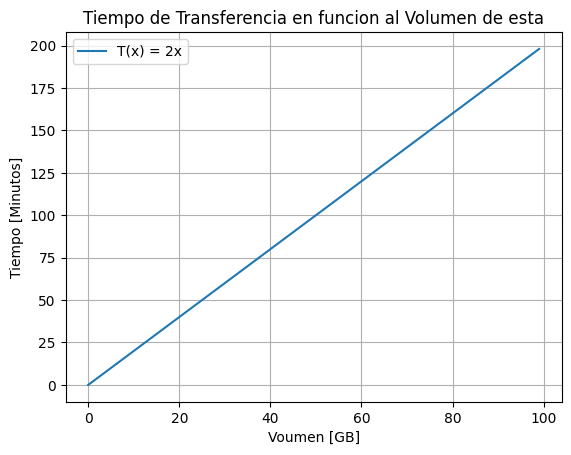

In [23]:

print(f'''1.
La variable independiente seria el volumen de de datos en GB
La variable dependiente seria el tiempo de transferencia en Minutos
	''')

import numpy

datos = numpy.array([5 ,10, 25, 50, 100])
minutos = numpy.array([10, 20, 50, 100, 200])

pendiente, intercepto = numpy.polyfit(datos, minutos, 1)
pendiente = round(pendiente,2)
intercepto = round(intercepto,2)

# coeficiente de posicion es de 0
print(f'2. \nLa funcion que relaciona el volumen de datos con el tiempo de transferencia es t(x) = {int(pendiente)}x \n')

print(f'3. \nLa pendiente de nuestra funcion t(x) es positiva, es decir, mientras más datos son transferidos, más minutos toma la transferencia,\nen este caso, la cantidad de minutos que toma la transferencia es el doble del volumen en GB de la transferencia\n')

def t(x):
	return pendiente * x + intercepto

print(f'4. \nEl tiempo de transferencia para 73.2 GB es de {t(73.2)} minutos \n')

from scipy.optimize import fsolve

# para 123.5 minutos
def t123min(x):
	return pendiente * x + intercepto - 123.5


tiempo = numpy.linspace(0,100,1)
solution = fsolve(t123min,tiempo)
print(f'5.\nLa cantidad de datos que se pueden transferir en 123.5 minutos es de {solution[0]:.2f} GB')

import matplotlib.pyplot as pyplot

datos_trans = numpy.arange(0,100,1)

pyplot.plot(datos_trans, t(datos_trans), label='T(x) = 2x')
pyplot.title('Tiempo de Transferencia en funcion al Volumen de esta')
pyplot.xlabel('Voumen [GB]')
pyplot.ylabel('Tiempo [Minutos]')
pyplot.legend()
pyplot.grid()

print('6. ')
pyplot.show()


# Problema 3


Una empresa de tecnología quiere optimizar el tiempo de carga y descarga de archivos en su servicio de almacenamiento en la nube. Los tiempos medios para diferentes tamaños de archivos son los siguientes:

<p><center>

| Tamaño del archivo (MB) | Tiempo de carga (s) | Tiempo de descarga (s)|
|-------------------------|---------------------|-----------------------|
|$$50$$                   |$$10$$               |$$8$$                  |
|$$100$$                  |$$20$$               |$$16$$                 |
|$$250$$                  |$$50$$               |$$40$$                 |
|$$500$$                  |$$100$$              |$$80$$                 |
|$$1.000$$                 |$$200$$              |$$160$$                |

</center></p>

1. Encuentra las funciones que modelan el tiempo de carga $f(x)$ y el tiempo de descarga $g(x)$ en función del tamaño del archivo $x$. Utiliza la función *polyfit* de *Numpy* (debes encontrar dos funciones).
2. Define variable dependiente e independiente, para ambas funciones, indicando su unidad de medida.
3. Calcula el tiempo de carga y descarga para un archivo de $750$ MB.
4. Utiliza la función *fsolve* de *Scipy* para determinar el tamaño del archivo si el tiempo de carga es de $163$ segundos.
5. Un trabajador insiste en que si el tiempo de descarga es de $195$ segundos, el tamaño del archivo es $1.200$ MB. ¿Tiene razón? Utiliza *Python* para determinar.
6. Grafica ambas funciones en el mismo gráfico, indicando nombre de los ejes y unidades de medida. Utiliza la librería *Matplotlib* para graficar.

1. 
La funcion que modela el tiempo de carga en funcion del tamaño de archivo es f(x) = 0.2x 
Y la funcion que modela el tiempo de descarga en funcion del tamaño del archivo es g(x) = 0.16x
2.
La variable independiente seria el tamaño del archivo en MB
La variable dependientes seria el tiempo de carga y de descarga medido en Segundos
	
3. 
El tiempo de carga y de descarga para un archivo de 750 MB es de 150 segundos y 120 segundos respectivamente 

4.
El tamaño de un archivo para un carga de 163 segundos es de 815 MB 

5.
El trabajador estaria equivocado, ya que un archivo con un peso de 1200 MB se demoraria 192 segundos en descargar contrario a los 195 segundos afirmados por el trabajador 

6. 


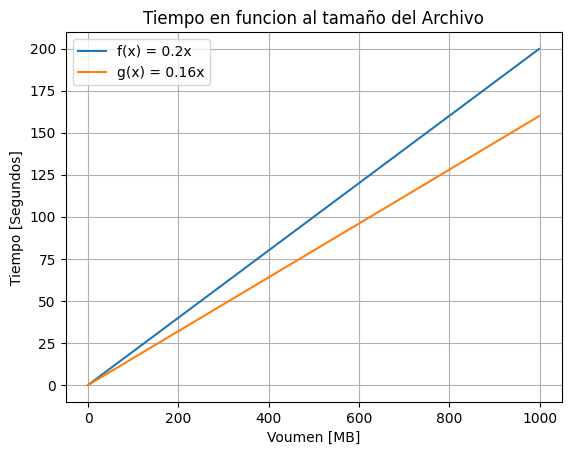

In [8]:
import numpy

archivo = numpy.array([50 ,100, 250, 500, 1000])
carga = numpy.array([10, 20, 50, 100, 200])
descarga = numpy.array([8, 16, 40, 80, 160])

pendienteF, interceptoF = numpy.polyfit(archivo, carga, 1)
pendienteG, interceptoG = numpy.polyfit(archivo, descarga, 1)
pendienteF = round(pendienteF,2)
pendienteG = round(pendienteG,2)
interceptoF = round(interceptoF,2)
interceptoG = round(interceptoG,2)


print(f'1. \nLa funcion que modela el tiempo de carga en funcion del tamaño de archivo es f(x) = {pendienteF}x \nY la funcion que modela el tiempo de descarga en funcion del tamaño del archivo es g(x) = {pendienteG}x')


print(f'''2.
La variable independiente seria el tamaño del archivo en MB
La variable dependientes seria el tiempo de carga y de descarga medido en Segundos
	''')


def f(x): # Carga
	return pendienteF * x + interceptoF
def g(x): # Descarga
	return pendienteG * x + interceptoG

print(f'3. \nEl tiempo de carga y de descarga para un archivo de 750 MB es de {f(750):.0f} segundos y {g(750):.0f} segundos respectivamente \n')

from scipy.optimize import fsolve

# para 163 MB
def f163mb(x):
	return pendienteF * x + interceptoF - 163

s = numpy.linspace(0,100,1)

solution = fsolve(f163mb,s)
print(f'4.\nEl tamaño de un archivo para un carga de 163 segundos es de {solution[0]:.0f} MB \n')


print(f'5.\nEl trabajador estaria equivocado, ya que un archivo con un peso de 1200 MB se demoraria {g(1200):.0f} segundos en descargar contrario a los 195 segundos afirmados por el trabajador \n')


import matplotlib.pyplot as pyplot

datos = numpy.arange(0,1000,1)

pyplot.plot(datos, f(datos), label=f'f(x) = {pendienteF}x')
pyplot.plot(datos, g(datos), label=f'g(x) = {pendienteG}x')
pyplot.title('Tiempo en funcion al tamaño del Archivo')
pyplot.xlabel('Voumen [MB]')
pyplot.ylabel('Tiempo [Segundos]')
pyplot.legend()
pyplot.grid()

print('6. ')
pyplot.show()


# Problema 4

El uso de memoria $M(x)$ (en GB) de un servidor en función del número de usuarios activos $x$ está dado por la función lineal:

 $$M(x) = 0.5x + 2$$

1. Determina la variable dependiente e independiente, indicando unidad de medida.
2. Identifica e interpreta la pendiente de la función.
3. ¿Cuánta memoria del servidor está en uso cuando no hay usuarios activos?
4. ¿Cuánta memoria del servidor está en uso cuando hay $637$ usuarios activos?
5. Utiliza *Python* para determinar cuántos usuarios activos provocan un uso de memoria de $32$ GB.
6. ¿Es posible un uso de memoria de $59,8$ GB?

In [16]:
def M(x): return 0.5*x + 2

print(f'''1.
La variable independiente seria el numero de usuarios activos
La variable dependientes seria el uso de memoria en GB

2.
La pendiente de la funcion M(x) es de 0.5, esta siendo positivo lo cual significa la variable dependiente crece con la variable independiente

3.
El servidor usaria {M(0):.0f} GB de memoria si no hay usuarios activos, gracias al coeficiente de posicion de la funcion

4.
El servidor usaria {M(637):.1f} GB de memoria cuando hay 637 usuarios activos
	''')

from scipy.optimize import fsolve

# para 32 GB
def M32GB(x): return 0.5*x + 2 - 32

s = numpy.linspace(0,100,1)

solution = fsolve(M32GB,s)
print(f'5.\nSe necesitarian {solution[0]:.0f} usuarios activos para provocar un uso de memoria de 32 GB \n')

# para 59.8 GB
def M59GB(x): return 0.5*x + 2 - 59.8

solution = fsolve(M59GB,s)
print(f'5.\nSe necesitarian {solution[0]:.1f} usuarios activos para provocar un uso de memoria de 59.8 GB; los usuarios al no poder ser divisible, harian que este uso de memoria imposible \n')


1.
La variable independiente seria el numero de usuarios activos
La variable dependientes seria el uso de memoria en GB

2.
La pendiente de la funcion M(x) es de 0.5, esta siendo positivo lo cual significa la variable dependiente crece con la variable independiente

3.
El servidor usaria 2 GB de memoria si no hay usuarios activos, gracias al coeficiente de posicion de la funcion

4.
El servidor usaria 320.5 GB de memoria cuando hay 637 usuarios activos
	
5.
Se necesitarian 60 usuarios activos para provocar un uso de memoria de 32 GB 

5.
Se necesitarian 115.6 usuarios activos para provocar un uso de memoria de 59.8 GB 



# Problema 5

El costo de operación mensual $C(x)$ (en miles de dólares) de un data center en función del número de servidores $x$ está dado por la función lineal:

 $$C(x) = 1,5x + 10$$

1. Determine la variable dependiente e independiente, indicando unidad de medida.
2. ¿Qué representa la pendiente en el contexto del problema?
3. ¿Qué representa el intercepto en el contexto del problema?
4. Calcula el costo de operación cuando hay $47$ servidores.
5. Determina cuántos servidores hay cuando el costo de operación es de $92.500$ dólares. Utiliza *Python* para resolver.


In [21]:
print(f'''1.
La variable independiente seria el numero de servidores
La variable dependientes seria el costo operacional mensual en Miles de Dolares [$]

2.
La pendiente representa el costo de correr cada servidor, en este caso serian 1.5 miles de dolares por servidor

3.
El intercepto representa el costo base del data center independiente de la cantidad de servidores, en este caso serian 10 mil dolares
	''')

def C(x): return 1.5*x + 10

print(f'4.\nEl costo de operar un data center de 47 servidores es de {C(47)} miles de dolares\n')

# para 92.5 MDolares
def C92d(x): return 1.5*x + 10 - 92.5

s = numpy.linspace(0,100,1)

solution = fsolve(C92d,s)
print(f'5.\nEn un Data Center cual costo de operacion es de 92.5 miles de dolares, deberian haber {solution[0]:.0f} servidores')


1.
La variable independiente seria el numero de servidores
La variable dependientes seria el costo operacional mensual en Miles de Dolares [$]

2.
La pendiente representa el costo de correr cada servidor, en este caso serian 1.5 miles de dolares por servidor

3.
El intercepto representa el costo base del data center independiente de la cantidad de servidores, en este caso serian 10 mil dolares
	
4.
El costo de operar un data center de 47 servidores es de 80.5 miles de dolares

5.
En un Data Center cual costo de operacion es de 92.5 miles de dolares, deberian haber 55 servidores


# Problema 6

El número de visitas diarias $V(x)$ en un sitio web, en función del número de campañas publicitarias $x$, está modelado por la función:

$$V(x) = 300x + 500$$

Los administradores del sitio consideran contratar $20$ campañas publicitarias como máximo.

1. Defina variable dependiente e independiente del problema, indicando unidad de medida.
2. Determine el dominio contextualizado de la función.
3. Interprete la pendiente de la función en el contexto del problema.
4. Determine la cantidad de visitas diarias cuando se ejecutan $5$ campañas publicitarias.
5. Utilizando la función *fsolve* de *Scipy* responde: ¿cuántas campañas publicitarias se deben ejecutar para alcanzar $4.700$ visitas diarias?

In [26]:
print(f'''1.
La variable independiente seria el numero de campañas publicitarias
La variable dependientes seria las visitas diarias medidas en Visitas

2.
El dominio contextualisado de la funcion vendria siendo [ 0 , ∞+ [, del minimo de campañas que se pueden correr (0) a un infinito de campañas

3.
La pendiente de la funcion tiene un valor de 300, representando el numero de visitas ganadas por cada campaña publicitaria
	''')

def V(x): return 300*x + 500

print(f'4.\nLa cantidad de visitas diarias recibidas cuando se ejecutan 5 campañas publicitarias es de {V(5):.0f} visitas\n')

# para 4700 visitas
def V4700v(x): return 300*x + 500 - 4700

s = numpy.linspace(0,100,1)

solution = fsolve(V4700v,s)
print(f'5.\nSe deben ejecutar {solution[0]:.0f} campañas publicitarias para lograr 4700 visitas diarias\n')


1.
La variable independiente seria el numero de campañas publicitarias
La variable dependientes seria las visitas diarias medidas en Visitas

2.
El dominio contextualisado de la funcion vendria siendo [ 0 , ∞+ ], del minimo de campañas que se pueden correr (0) a un infinito de campañas

3.
La pendiente de la funcion tiene un valor de 300, representando el numero de visitas ganadas por cada campaña publicitaria
	
4.
La cantidad de visitas diarias recibidas cuando se ejecutan 5 campañas publicitarias es de 2000 visitas

5.
Se deben ejecutar 14 campañas publicitarias para lograr 4700 visitas diarias



# Problema 7

La depreciación es el proceso en que los activos físicos, como la maquinaria, vehículos, equipos, etc., pierden valor con el tiempo debido a factores como el desgaste, el uso y la obsolescencia. El valor estimado que tendrá el activo al final de su vida útil se conoce como *valor residual*.

En este contexto, sabemos que el valor residual $R(t)$ (en miles de dólares) de un equipo tecnológico está modelado por la función lineal:

$$R(t) = -1,2t + 10$$

donde $t$ corresponde a la antigüedad del equipo (en años).

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. ¿Qué representa la pendiente de la función en el contexto del problema?
3. ¿Cuál es el valor residual inicial del equipo?
4. Determine el dominio contextualizado de la función, si sabe que el valor del equipo al final de su vida útil es de $400$ dólares.
5. Determina, utilizando la función *def* de *Python*, el valor residual del equipo con $3$ años y seis meses de antigüedad.
6. Determina, utilizando la función *fsolve*  de *Scipy*, la antigüedad del equipo cuando su valor residual es de $4.000$ dólares.
7. Grafica la función utilizando la biblioteca *Matplotlib*. Interpreta lo observado.

In [30]:
print(f'''1.
La variable independiente seria la antigüedad del equipo en Años
La variable dependientes seria el valor residual en Miles de Dolares [$]

2.
La pendiente representa el proceso de depreciacion que ocurre en la maquinaria, esta siendo negativa y decreciente con la variable independiente

3.
El valor residual inicial seria de 10 mil dolares, representado en la funcion por el intercepto de un valor 10+.
    ''')
# para 400 dolars
def R400d(t): return -1.2*t + 10 - 0.4

s = numpy.linspace(0,100,1)

solution = fsolve(R400d,s)
print(f'4.\nEl dominio contextualizado es de [ 0 , {solution[0]:.0f} ], {solution[0]:.0f} siendo la cantidad de años que tienen que transcurrir para llegar al valor final del equipo de 400 dolares\n')

def R(t): return -1.2*t + 10

print(f'5.\nEl valor residual de un equipo con 3 años y medio es de {R(3.5)} Mil Dolares')

1.
La variable independiente seria la antigüedad del equipo en Años
La variable dependientes seria el valor residual en Miles de Dolares [$]

2.
La pendiente representa el proceso de depreciacion que ocurre en la maquinaria, esta siendo negativa y decreciente con la variable independiente

3.
El valor residual inicial seria de 10 mil dolares, representado en la funcion por el intercepto de un valor 10+.
    
4.
El dominio contextualizado es de [ 0 , 8 ], 8 siendo la cantidad de años que tienen que transcurrir para llegar al valor final del equipo de 400 dolares

5.
El valor residual de un equipo con 3 años y medio es de 5.8 Mil Dolares


# Problema 8

El tiempo de ejecución $T(x)$ (en milisegundos) de un algoritmo depende de la cantidad de elementos de entrada (en unidades) mediante una función lineal cuya gráfica se muestra en la siguiente imagen:

<br>

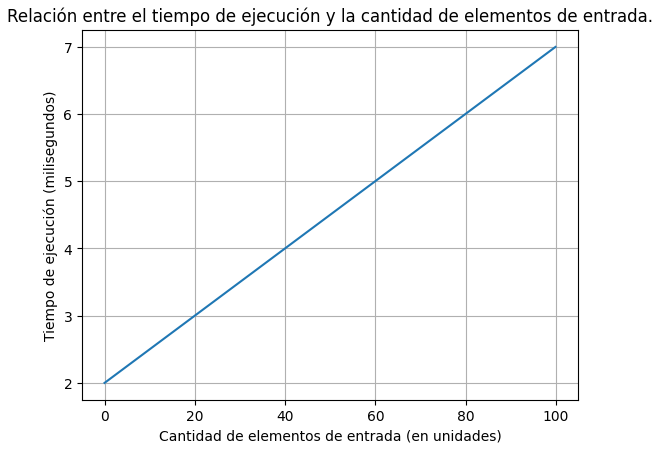

<br>

1. Determina la forma algebraica de la función que mejor se ajusta al gráfico. Utiliza la función polyfit de Scipy para calcular.
2. Determina el tiempo de ejecución del algoritmo para $67$ elementos de entrada.
3. ¿Cuántos elementos de entrada se utilizaron si el tiempo de ejecución fue de $6,4$ milisegundos?

# Problema 9

El consumo de energía de un servidor $E(t)$  en función del tiempo $t$ después de implementar una optimización, está modelado por la función lineal que se observa en el siguiente gráfico:

<br>

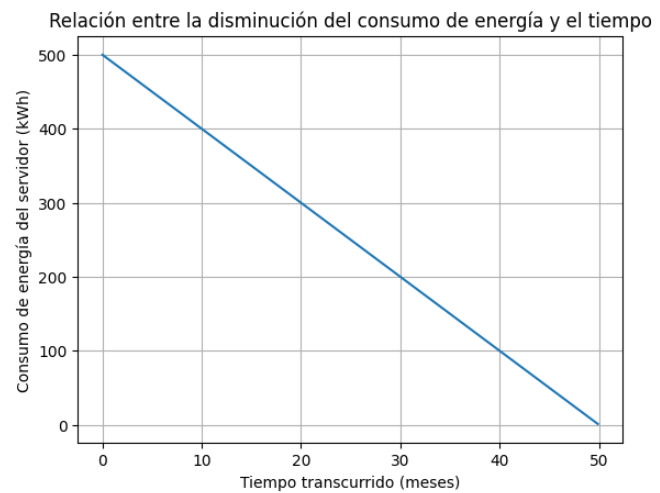

<br>

1. Utiliza la función *polyfit* de *Numpy* para determinar la forma algebraica que mejor se ajusta al gráfico.
2. Interprete la pendiente en el contexto del problema.
3. Determine el consumo de energía luego de un año desde que se implementó la optimización.
4. Encuentre el tiempo transcurrido desde la implementación de la optimización para que la energía consumida sea de $200$ kWh.

# Problema 10

Dos atletas profesionales corren por un camino recto. Durante los primeros $10$ segundos del trayecto, la distancia recorrida (en metros) por el atleta $1$ está dada por la función:

$$g(t) = 0,7t^{2}$$

mientras que la distancia recorrida por el atleta $2$ está dada por la función:

$$f(t) = 10t $$

donde $t$ corresponde al tiempo transcurrido (en segundos) desde el inicio del trayecto.

<br>

1. ¿Cuál de los dos atletas siempre mantuvo una velocidad constante? Justifique. *Recomendación: grafica las funciones utilizando Matlplotlib.*
2. Si la meta se encontraba a $100$ metros de la partida ¿cuál atleta llega primero?
3. ¿A qué distancia se encontraban uno del otro cuando transcurren $8$ segundos? ¿Y cuando transcurren $10$ segundos?
4. Entre el segundo $8$ y el $10$, ¿cuál atleta iba más rápido? Justifique apropiadamente.

# Problema 11

Un *Data Center* ha cotizado el costo de desarrollar un proyecto con dos empresas. El costo (en millones de pesos) entregado por la empresa $1$ está modelado por la función:

$$C_{1}(t) = 12t + 50$$

y costo (en millones de pesos) entregado por la empresa $2$ está modelado por la función:

$$C_{2}(t) = 8t + 100$$

donde $t$ corresponde al tiempo que demoren en realizar el proyecto (en semanas).

<br>

1. Utilizando la biblioteca *Matplotlib* grafique ambas funciones, indicando el nombre de los ejes coordenados junto con su unidad de medida.
2. Si con la empresa $1$ pagaron $155$ millones de pesos ¿cuántas semanas duró el trabajo?
3. Analizando el gráfico de la pregunta $1$, determine: ¿cuándo conviene desarrollar el proyecto con la empresa $1$? ¿Y la empresa $2$?